In [1]:
from fonctions import *

In [2]:
# récupération des articles et des tags

dic = lire_json("articlesTags_Stanford.json")

new_dic = reorganiser_POS(dic)

# séparation des informations dans trois listes différentes

chemins_articles = [x for x in new_dic.keys()]

liste_tags = [x[1] for x in new_dic.values()]

liste_titres = [x[2] for x in new_dic.values()]

# Vectorisation des documents et création du model

X, V = creer_X(liste_tags, 2, 3)

In [7]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import operator

In [ ]:
centers = np.ndarray(shape=(k,len(X[0])), dtype=float)
    for i in range(0, k):
        if i != cluster_poub:
            centers[i] = kmeanModel.cluster_centers_[i]

In [45]:
# calcul de la distance entre les vecteurs de chaque clusters
# 2 mesures : distortion et inertie
# voir : https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

distortions = [] 
inertias = []  
K = range(2, 10)

for k in K: 
    print("%s clusters" % k)
    kmeanModel = creer_model_KM(k, X)
    
    dic_eff = effectifs_clusters(kmeanModel)
    print(dic_eff)
    
    predictions = kmeanModel.predict(X)
    cluster_poub = -1
    if k > 1:
        cluster_poub = max(dic_eff.items(), key=operator.itemgetter(1))[0]
    
    new_X = []
    for i in range(len(X)):
        if predictions[i] != cluster_poub:
            new_X.append(X[i])
            
    X_2 = np.array(new_X)
    kmeanModel2 = creer_model_KM((k-1), X_2)
    dic_eff = effectifs_clusters(kmeanModel2)
    print(dic_eff)
    
    distortions.append(sum(np.min(cdist(X_2, kmeanModel2.cluster_centers_, 
                    'euclidean'),axis=1)) / X_2.shape[0]) 
    inertias.append(kmeanModel2.inertia_) 

{1: 1892, 0: 3793}
{0: 1892}
{2: 1650, 1: 1013, 0: 3022}
{1: 1650, 0: 1013}
{2: 1093, 1: 964, 0: 2628, 3: 1000}
{2: 1101, 1: 964, 0: 992}
{1: 1002, 4: 737, 0: 2283, 2: 880, 3: 783}
{1: 997, 3: 736, 2: 886, 0: 783}
{5: 882, 1: 474, 0: 723, 2: 2106, 4: 807, 3: 693}
{2: 891, 4: 469, 0: 712, 1: 811, 3: 696}
{0: 659, 4: 433, 6: 702, 2: 2004, 5: 805, 1: 673, 3: 409}
{2: 661, 0: 437, 1: 677, 5: 804, 4: 669, 3: 433}
{1: 429, 6: 672, 2: 619, 3: 1939, 7: 545, 4: 440, 0: 464, 5: 577}
{4: 429, 5: 658, 1: 621, 3: 536, 2: 438, 6: 462, 0: 602}
{1: 647, 5: 579, 4: 610, 3: 1707, 8: 466, 6: 458, 7: 569, 2: 316, 0: 333}
{6: 572, 1: 645, 2: 567, 0: 499, 4: 453, 5: 597, 7: 311, 3: 334}


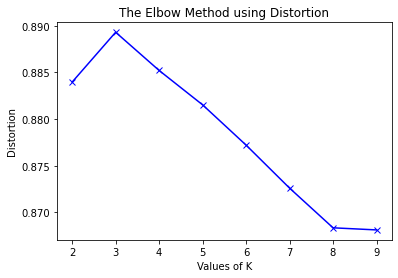

In [46]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

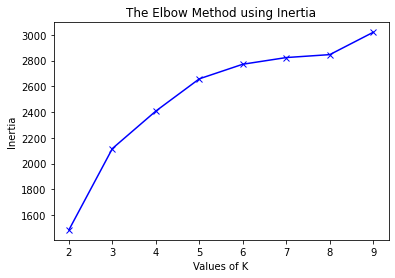

In [47]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()